# Concrete Strength Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("concrete_data.csv")

In [3]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.shape  #Gives total rows and columns of dataset

(1030, 9)

In [5]:
data = data.drop_duplicates() # Removes the same rows assigned multiples times in th dataset

In [6]:
data.shape

(1005, 9)

In [7]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


##  Problem Statement:

Create a model which can predict the strength of concrete

- Target Variable : Strength
- Predictors : cement, blast_furnace_slaf,fly_ash,water,superpasticizer,coarse_aggregate, fine_aggreagate, age

### Basic Data Exploration

In [8]:
data.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [9]:
data.nunique()

cement                           278
blast_furnace_slag               185
fly_ash                          156
water                            195
superplasticizer                 111
coarse_aggregate                 284
fine_aggregate                   302
age                               14
concrete_compressive_strength    845
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1005 non-null   float64
 1   blast_furnace_slag             1005 non-null   float64
 2   fly_ash                        1005 non-null   float64
 3   water                          1005 non-null   float64
 4   superplasticizer               1005 non-null   float64
 5   coarse_aggregate               1005 non-null   float64
 6   fine_aggregate                 1005 non-null   float64
 7   age                            1005 non-null   int64  
 8   concrete_compressive_strength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [11]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Let's look at distribution of Target Variable

- If  target variable's distribution is too skewed then the predictive modelling  will not be possible.
- Bell curve is desirable but slightly positive or negative skewed is fine
- When performing Regression, make sure the  histogram looks like a bell curve or slightly skewed version of it. Otherwise it impacts the ML algorithms ability to learn all the scenarios

In [12]:
import matplotlib.pyplot as plt

<AxesSubplot:>

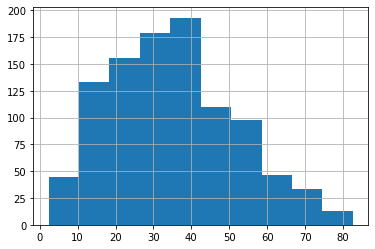

In [13]:
data['concrete_compressive_strength'].hist()

## Exploratory Data Analysis

- Categorical Data : Use Bar Chart,Heatmap,Scatterplot
- Continuous Data : Use Hist Plot,BoxPlot,DistPlot

array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'blast_furnace_slag'}>,
        <AxesSubplot:title={'center':'fly_ash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'superplasticizer'}>,
        <AxesSubplot:title={'center':'coarse_aggregate'}>],
       [<AxesSubplot:title={'center':'fine_aggregate '}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

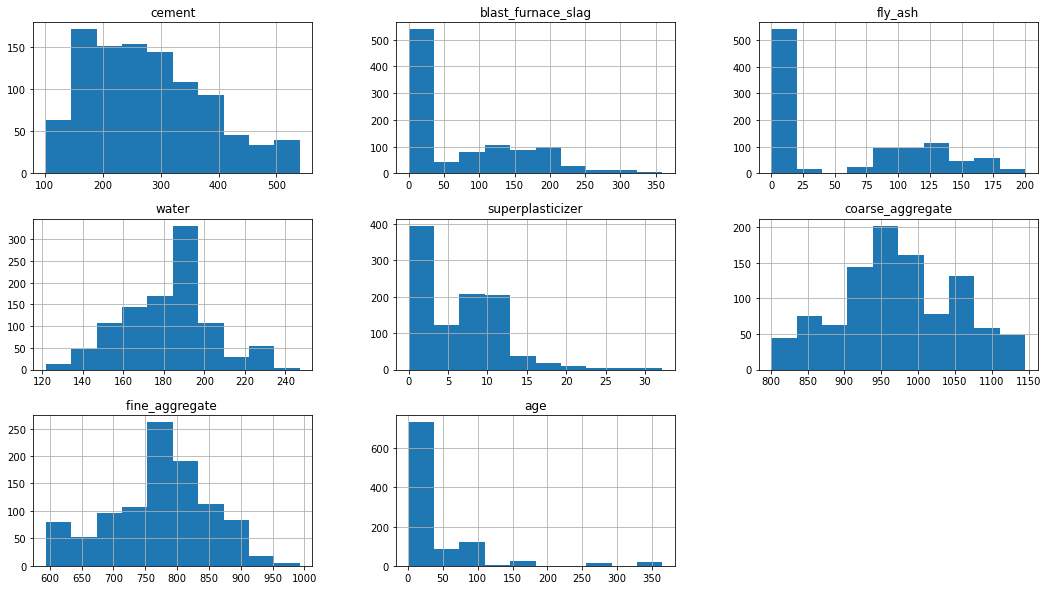

In [14]:
data.hist(['cement','blast_furnace_slag','fly_ash','water','superplasticizer','coarse_aggregate','fine_aggregate ','age'],figsize=(18,10))

The ideal outcome of this histogram should be bell curve or slightly bell curved. If there is too much skewness then outlier treatment should be done and the column should be re-examined.If that does not happen then does not solve the problem then reject the column

## Selected continuous variable

- __cement__ : selected. The distribution is good.
- __blast_furnace_slag__ : selected. The distribution is good.
- __fly_ash__ : selected. The distribution is good.
- __water__ : selected. The distribution is good.
- __superplasticizer__ : selected. The distribution is good.
- __coarse_Aggreage__ : selected. The} distribution is good.
- __fine_aggregate__ : selected. The distribution is good.
- __age__ : selected. The distribution is skewed, but the tail is thick,hence acceptable.

## Missing Value Treatment:

Missing values for column are treated separately.

If a column has more than 30% data missing, then missing value treartment cannnot be done. That column ,=must be rejected bacause too much information is missing.

There are below options available for treating missing values.
- Delete missing value rows if there are only few records
- Impute missing values with with MEDIAN/MEAN for continuous variable
- Impute missing values with with MODe for categorical variable
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [15]:
data.isnull()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [16]:
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

No missing values present in our data

## Outliers Treatment

- Method-1 : Delete the oultier records. Only if there are few rows lost. 
- Method-2 : Impute the outliers with some business logic.

In [17]:
continuous = ['cement','blast_furnace_slag','fly_ash','water','superplasticizer','coarse_aggregate','fine_aggregate ','age']

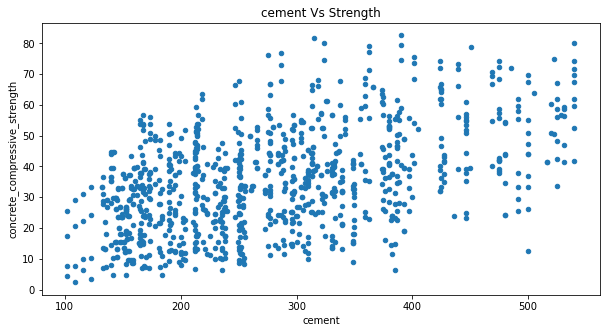

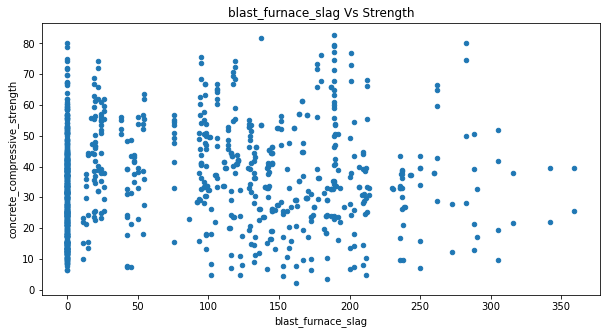

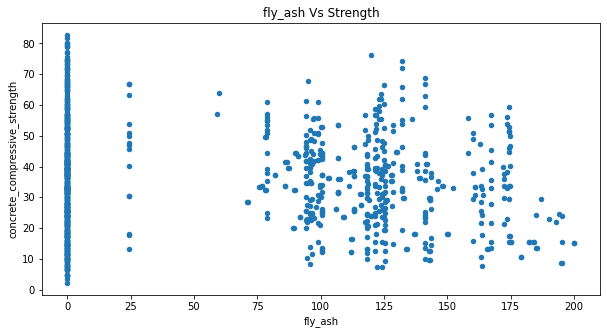

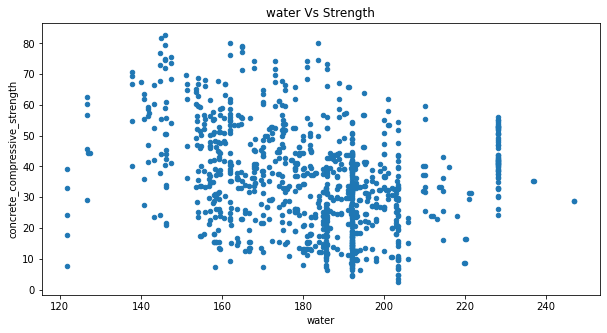

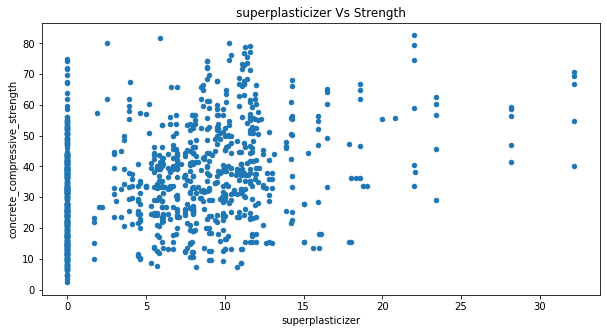

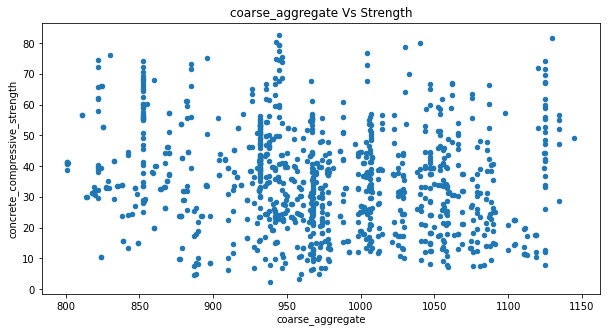

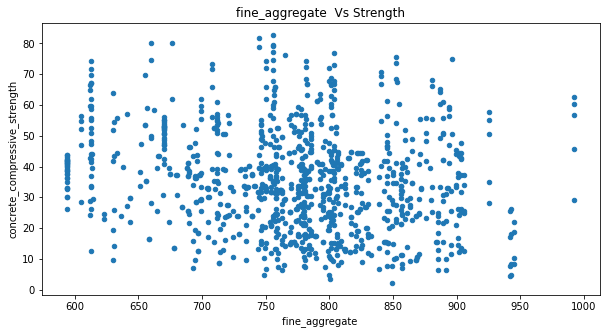

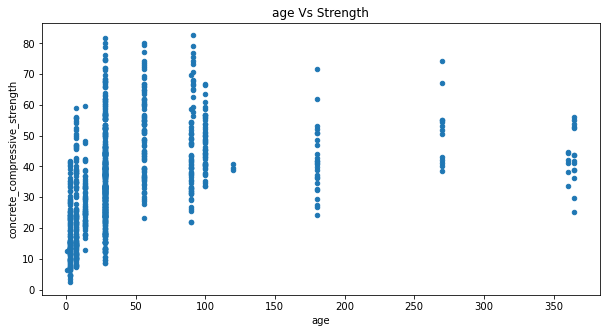

In [18]:
for pred in continuous:
    data.plot.scatter(x=pred, y='concrete_compressive_strength',figsize=(10,5),title=pred+" Vs "+"Strength")

In [19]:
continuousCols = ['concrete_compressive_strength','cement','blast_furnace_slag','fly_ash','water','superplasticizer','coarse_aggregate','fine_aggregate ','age']
corr = data[continuousCols].corr()  #Creating 

In [20]:
corr

,concrete_compressive_strength,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
concrete_compressive_strength,1.000000,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367
cement,0.488283,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348
blast_furnace_slag,0.103374,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759
fly_ash,-0.080648,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940
water,-0.269624,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284
superplasticizer,0.344209,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076
coarse_aggregate,-0.144717,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264
fine_aggregate,-0.186448,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572
age,0.337367,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000


Filtering only those columns whose correlation is > 0.5 with the target variable but as there are no columns whose correlation is > 0.5 rather than strength column itself, we are reducing our threshold to 0.3

In [21]:
corr['concrete_compressive_strength'][abs(corr['concrete_compressive_strength']>0.3)]

concrete_compressive_strength    1.000000
cement                           0.488283
superplasticizer                 0.344209
age                              0.337367
Name: concrete_compressive_strength, dtype: float64

Final Selected Columns:
Cement, Superplasticizer, Age with respect to concrete_compressive_strength

In [22]:
selected_col = ['cement','superplasticizer','age']

data[selected_col]  # Selecting final columns


,cement,superplasticizer,age
0,540.0,2.5,28
1,540.0,2.5,28
2,332.5,0.0,270
3,332.5,0.0,365
4,198.6,0.0,360
...,...,...,...
1025,276.4,8.9,28
1026,322.2,10.4,28
1027,148.5,6.1,28
1028,159.1,11.3,28


## Data Pre-Processing steps for ML

List of steps performed on predictor variables before data can be used for Machine Learning

1. Converting each ordinal categorical columns to numeric
2. Converting binary nominal categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data transformation (Optional): Standardization/Normalization of columns -->Important for Algo. like KNN,Neural Networks

In this data there is no ordinal categorical variable which is in string format

In [23]:
## Converting the nominal variables to numeric using get_dummies() method

# Treating all nominal variables at once  using dummy variables

data_numeric = pd.get_dummies(data[selected_col])

In [24]:
data_numeric

,cement,superplasticizer,age
0,540.0,2.5,28
1,540.0,2.5,28
2,332.5,0.0,270
3,332.5,0.0,365
4,198.6,0.0,360
...,...,...,...
1025,276.4,8.9,28
1026,322.2,10.4,28
1027,148.5,6.1,28
1028,159.1,11.3,28


In [25]:
data_numeric['Strength'] = data['concrete_compressive_strength']

In [26]:
data_numeric.head()

,cement,superplasticizer,age,Strength
0,540.0,2.5,28,79.99
1,540.0,2.5,28,61.89
2,332.5,0.0,270,40.27
3,332.5,0.0,365,41.05
4,198.6,0.0,360,44.30


## Splitting the variable into train and test data

In [27]:
target = 'Strength'
predictor = ['cement','superplasticizer','age']

X = data_numeric[predictor].values
y = data_numeric[target].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=21)

In [28]:
X_train.shape,y_train.shape

((703, 3), (703,))

In [29]:
X_test.shape,y_test.shape

((302, 3), (302,))

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 5,n_estimators= 100)

In [31]:
rf = model.fit(X_train,y_train)
prediction = rf.predict(X_test)

In [32]:
from sklearn import metrics

In [33]:
# Measuring goodness of the model fit in Training data
print('R2 Value:',metrics.r2_score(y_train,rf.predict(X_train)))

R2 Value: 0.7932935727388619


In [34]:
prediction

array([43.07799847, 27.2576594 , 32.78598531, 31.70350044, 43.32527939,
       40.26815217, 44.16413724, 62.70943566, 43.5384097 , 42.92757892,
       60.81222385, 31.51346513, 28.48424907, 31.62474256, 12.95863584,
       48.3659719 , 13.62830896, 31.62474256, 28.87229722, 41.2709481 ,
       30.90302018, 17.73704   , 38.52785157, 26.81518355, 37.94565444,
       13.69481687, 31.48250474, 61.4453886 , 23.15319335, 25.73322653,
       28.47323322, 49.50849641, 14.41256847, 24.33139053, 50.01610015,
       40.26664139, 59.59000777, 39.82781186, 39.64153305, 39.76683283,
       37.5574774 , 11.39875664, 24.15906851, 30.41515447, 33.11365331,
       28.41717171, 33.18127935, 40.003463  , 31.72707334, 40.35914682,
       63.13705372, 33.11365331, 26.9752427 , 13.83221672, 35.42433653,
       62.33707167, 18.80582472, 15.98125219, 49.94604879, 38.5788412 ,
       36.31474273,  8.47467515, 39.55708248, 47.2499809 , 57.93414622,
       60.24589592, 13.95224402, 12.95863584, 41.42591492, 41.71

In [35]:
feature_imp = pd.Series(rf.feature_importances_,index= predictor)

feature_imp

<AxesSubplot:>

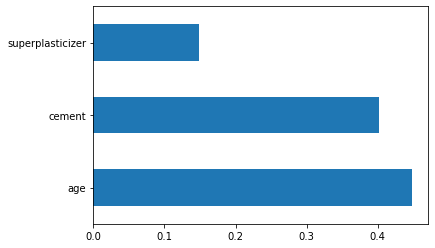

In [36]:
feature_imp.nlargest(10).plot(kind='barh')

Here in Random Forest we can see that Age factor is the most important feature which is affecting the strength of the concrete

In [37]:
# Printing some sample values of prediction

TestingDataRes = pd.DataFrame(data= X_test,columns=predictor)
TestingDataRes[target] = y_test
TestingDataRes[('Predicted' + target)] = np.round(prediction)
print(TestingDataRes[[target,'Predicted' + target]].head())

   Strength  PredictedStrength
0     47.13               43.0
1     18.20               27.0
2     24.48               33.0
3     19.69               32.0
4     61.24               43.0


 As the Predicted strength is not as expected ones we can try some hypertuning or error calculation or at last can take other model as best one.

In [38]:
TestingDataRes['APE'] = 100 * ((abs(TestingDataRes['Strength']-TestingDataRes['PredictedStrength']))/TestingDataRes['Strength'])

In [39]:
TestingDataRes['APE']

0       8.762996
1      48.351648
2      34.803922
3      62.519045
4      29.784455
         ...    
297    10.152740
298     1.515152
299    26.443545
300     7.468124
301    25.345278
Name: APE, Length: 302, dtype: float64

In [40]:
MAPE = np.mean(TestingDataRes['APE'])
MedianMAPE=np.median(TestingDataRes['APE'])


In [41]:
Accuracy = 100-MAPE
MedianAccuracy = 100-MedianMAPE

print('Mean accuracy on test data:',Accuracy)
print('Median accuracy on test data:',MedianAccuracy)

Mean accuracy on test data: 77.3088357574806
Median accuracy on test data: 85.04643905441034


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
accuracy_values = cross_val_score(model,X,y,cv=10)

In [44]:
print('Accuracy values for 10-Fold Cross Validation:\n',accuracy_values)

Accuracy values for 10-Fold Cross Validation:
 [0.25762506 0.64760933 0.7673313  0.56859087 0.56658733 0.49878496
 0.76508927 0.70041222 0.46325497 0.44658526]


In [45]:
print('Final Average Accuracy values:\n',round(accuracy_values.mean(),2))

Final Average Accuracy values:
 0.57


Also we can check that accuracy is not upto the mark so dropping this RandomForest Model here and trying AdaBoost

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  AdaBoostRegressor

In [47]:
DTR = DecisionTreeRegressor(max_depth = 10)
regmodel = AdaBoostRegressor(n_estimators = 100, base_estimator = DTR,learning_rate= 0.04)

In [48]:
AB = regmodel.fit(X_train,y_train)
prediction_AB = AB.predict(X_test)

In [49]:
# Measuring goodness of the model fit in Training data
print('R2 Value:',metrics.r2_score(y_train,AB.predict(X_train)))

R2 Value: 0.9714099386414032


<AxesSubplot:>

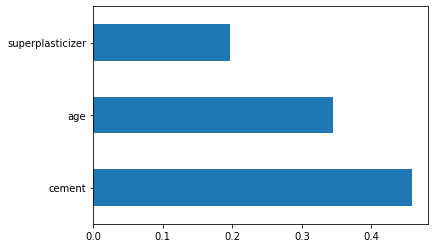

In [50]:
feature_imp = pd.Series(AB.feature_importances_,index= predictor)
feature_imp.nlargest(10).plot(kind='barh')

In [51]:
# Printing some sample values of prediction

TestingDataRes = pd.DataFrame(data= X_test,columns=predictor)
TestingDataRes[target] = y_test
TestingDataRes[('Predicted' + target)] = np.round(prediction_AB)
print(TestingDataRes[[target,'Predicted' + target]].head())

   Strength  PredictedStrength
0     47.13               47.0
1     18.20               28.0
2     24.48               24.0
3     19.69               30.0
4     61.24               61.0


In [52]:
TestingDataRes['APE'] = 100 * ((abs(TestingDataRes['Strength']-TestingDataRes['PredictedStrength']))/TestingDataRes['Strength'])

In [53]:
MAPE = np.mean(TestingDataRes['APE'])
MedianMAPE=np.median(TestingDataRes['APE'])

Accuracy = 100-MAPE
MedianAccuracy = 100-MedianMAPE

print('Mean accuracy on test data:',Accuracy)
print('Median accuracy on test data:',MedianAccuracy)

Mean accuracy on test data: 80.58223371533666
Median accuracy on test data: 87.78914196414


AdaBoost looks like a good model for this case